<a href="https://colab.research.google.com/github/bbrauser/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Office_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading the dataset from my local files. File was downloaded from [kaggle.com](kaggle.com/kapastor/the-office-imdb-ratings-per-episode?select=TheOfficeIMDBPerEpisode.csv)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving The Office Data Set.csv to The Office Data Set (3).csv


In [2]:
# Overall Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [59]:
# Making the dataframe
df = pd.read_csv('The Office Data Set.csv')

df['WrittenBy'].nunique()

45

In [4]:
# Set max row display
pd.set_option('display.max_row', 188)

In [5]:
# Dropping "Season" and "Description" columns
df = df.drop(columns=['Description'])

In [55]:
# Filtering out writers who have written 5 or more
# episodes and joining together
writers = df.groupby('WrittenBy').filter(lambda x: len(x) >= 5)
# writers = writers.sort_values('WrittenBy')

writers.head(200)

Season          9
Title         129
AirDate       127
Rating         25
Num_Votes     126
DirectedBy     48
WrittenBy      13
dtype: int64

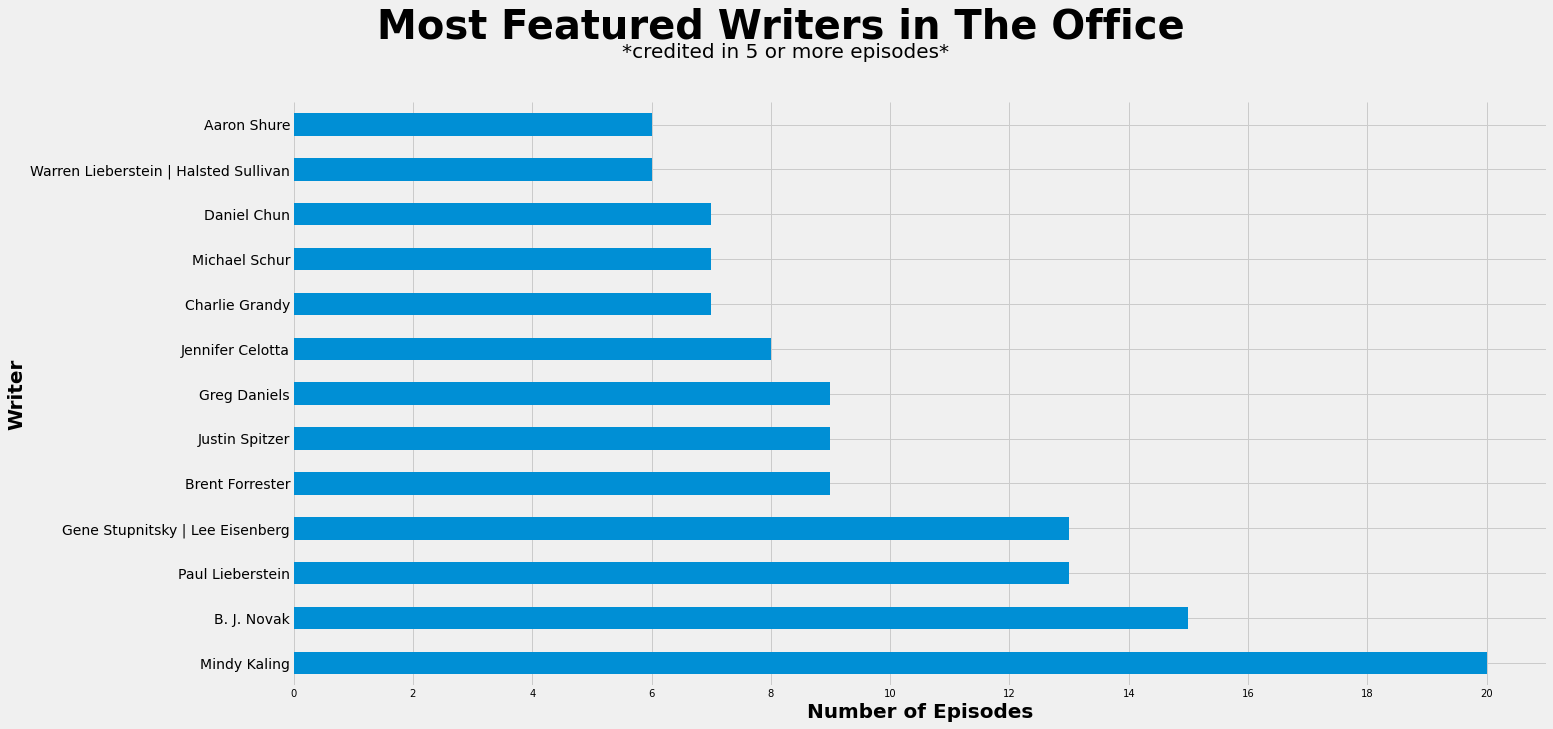

In [18]:
# Bar plot of Most Featured Writers
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

# x-axis tick marks and tick labels
ax.set_xticks(range(0,22,2))
ax.set_xticklabels(['0', '2', '4', '6', '8', '10', '12', '14', '16', '18', '20', '22'], fontsize=10)

# x axis label
ax.set_xlabel('Number of Episodes', fontsize=20, fontweight='bold')

# y axis label
ax.set_ylabel('Writer', fontsize=20, fontweight='bold')

# Graph title
ax.set_title("Most Featured Writers in The Office  ", x=.4, y=1.1, fontsize='40', fontweight='bold')

# graph subtitle
ax.text(s='*credited in 5 or more episodes*', x=5.5, y=13.5, fontsize='20')

# Remove Spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

most_featured_writers = writers['WrittenBy'].value_counts()[:15]

most_featured_writers.plot(kind = 'barh');

In [23]:
# Multi-line plot showing how the mean rating of the most featured writers compares to
# the mean rating of the most featured writers per season

overall = [round(df.loc[df['Season']==x]['Rating'].mean(),2) for x in range(1,max(df['Season']+1))]

bj = writers.loc[writers['WrittenBy'] == 'B. J. Novak']
bj = [round(bj.loc[bj['Season']==x]['Rating'].mean(),2) for x in range(1,max(df['Season']+1))]

mindy = writers.loc[writers['WrittenBy'] == 'Mindy Kaling']
mindy = [round(mindy.loc[mindy['Season']==x]['Rating'].mean(),2) for x in range(1,max(df['Season']+1))]

paul = writers.loc[writers['WrittenBy'] == 'Paul Lieberstein']
paul = [round(paul.loc[paul['Season']==x]['Rating'].mean(),2) for x in range(1,max(df['Season']+1))]

greg = writers.loc[writers['WrittenBy'] == 'Greg Daniels']
greg = [round(greg.loc[greg['Season']==x]['Rating'].mean(),2) for x in range(1,max(df['Season']+1))]

df1 = pd.DataFrame({"Season": range(1,10), 
                    "Overall": overall, 
                    "B. J. Novak": bj, 
                    "Mindy Kaling": mindy, 
                    "Paul Lieberstein": paul, 
                    "Greg Daniels": greg})

df1.describe()

,Season,Overall,B. J. Novak,Mindy Kaling,Paul Lieberstein,Greg Daniels
count,9.000000,9.000000,8.000000,8.000000,9.000000,6.000000
mean,5.000000,8.240000,8.377500,8.273750,8.425556,8.861667
std,2.738613,0.334253,0.267355,0.340333,0.634825,0.509133
min,1.000000,7.630000,7.950000,7.800000,7.500000,8.400000
25%,3.000000,7.980000,8.240000,8.012500,8.100000,8.527500
50%,5.000000,8.320000,8.375000,8.295000,8.350000,8.750000
75%,7.000000,8.500000,8.525000,8.562500,8.700000,8.950000
max,9.000000,8.600000,8.800000,8.700000,9.700000,9.800000


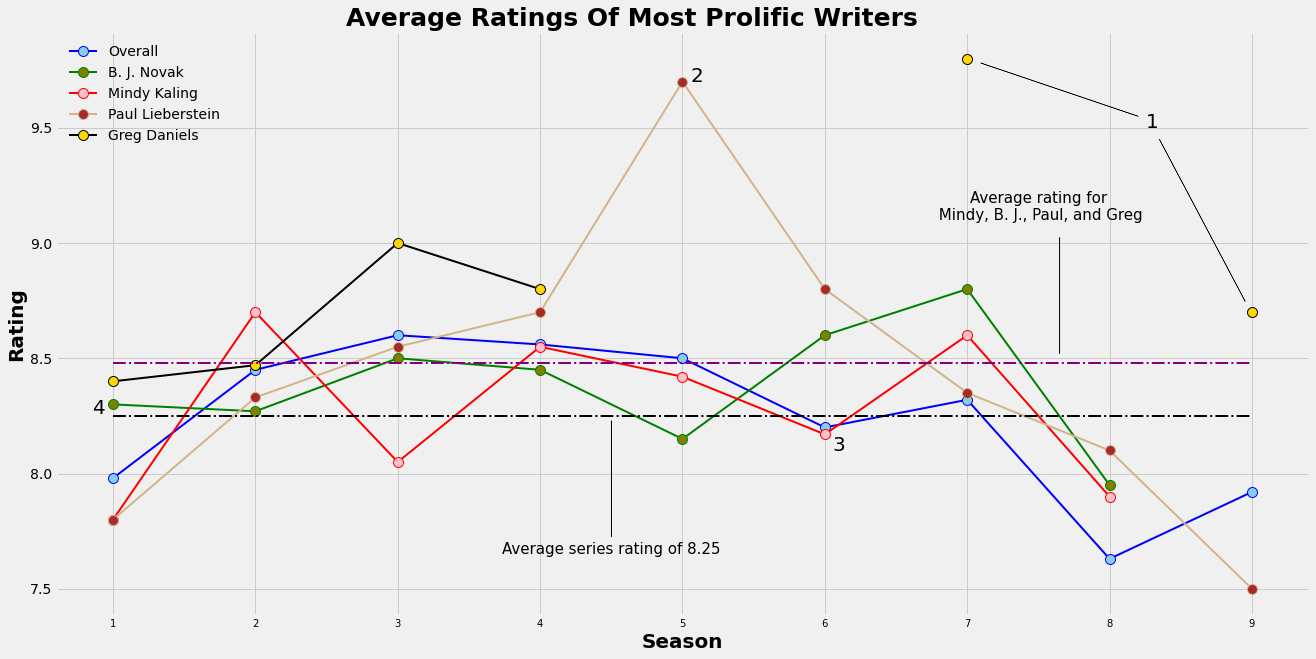

In [54]:
# multiple line plot
# plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

# graph size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

# x axis label
ax.set_xlabel('Season', fontsize=20, fontweight='bold')

# y axis label
ax.set_ylabel('Rating', fontsize=20, fontweight='bold')

# x-axis tick marks and tick labels
ax.set_xticks(range(1,10,1))
ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9'], fontsize=10)

# Graph title
ax.set_title("Average Ratings Of Most Prolific Writers", x=.46, y=1, fontsize='25', fontweight='bold')

# Lines
plt.plot('Season', 'Overall', data=df1, marker='o', markerfacecolor='skyblue', markersize=10, color='blue', linewidth=2)
plt.plot('Season', 'B. J. Novak', data=df1, marker='o', markerfacecolor = 'olive', markersize = 10, color='green', linewidth=2)
plt.plot('Season', 'Mindy Kaling', data=df1, marker='o', markerfacecolor = 'pink', markersize = 10, color='red', linewidth=2)
plt.plot('Season', 'Paul Lieberstein', data=df1, marker='o', markerfacecolor = 'brown', markersize = 10, color='tan', linewidth=2)
plt.plot('Season', 'Greg Daniels', data=df1, marker='o', markerfacecolor = 'gold', markersize = 10, color='black', linewidth=2)
plt.plot([1, 9], [df['Rating'].mean(), df['Rating'].mean()], 'k-', lw=2, linestyle='-.')
plt.plot([1, 9], [8.48, 8.48], 'k-', lw=2, linestyle='-.', color = 'purple')

ax.text(8.3, 9.5, "1", ha='center', fontsize = 20)
ax.text(5.1, 9.7, "2", ha='center', fontsize = 20)
ax.text(6.1, 8.1, "3", ha='center', fontsize = 20)
ax.text(0.9, 8.259, "4", ha='center', fontsize = 20)
ax.text(4.5, 7.65, "Average series rating of 8.25", ha='center', fontsize = 15)
ax.text(7.5, 9.1, "Average rating for\n Mindy, B. J., Paul, and Greg", ha='center', fontsize = 15)

plt.arrow(8.2, 9.55, -1.1, 0.23, color = 'black')
plt.arrow(8.35, 9.45, .6, -0.7, color = 'black')
plt.arrow(4.5, 7.725, 0, 0.5, color = 'black')
plt.arrow(7.65, 8.52, 0, .5, color = 'black')

ax.legend(loc='upper left', frameon=False);